In [1]:
import os
import random
import imutils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.preprocessing import image
from PIL import Image, ImageDraw, ImageOps

/home/vlados/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# This part is made RAM located dataset
path = '/media/vlados/FreeSpace/Kaggle/train_simple' #csv files path

def draw_it(raw_strokes):
        image_ = Image.new("P", (255,255), color=0)
        image_draw = ImageDraw.Draw(image_)

        for stroke in eval(raw_strokes):
            for i in range(len(stroke[0])-1):

                image_draw.line([stroke[0][i], 
                                 stroke[1][i],
                                 stroke[0][i+1], 
                                 stroke[1][i+1]],
                                fill=255, width=6)
        image_ = np.array(image_) 
        image_ = imutils.resize(image_, width=32)
        image_ = image_[:,:,np.newaxis]
        
        return (image_)

def dataset_maker(path, train_img, test_img):
    
    test_iterator = 0
    train_iterator = 0
    classes_name = os.listdir(path)
    
    num_test_samples = test_img * len(classes_name)
    num_train_samples = train_img * len(classes_name)
    
    X_train = np.zeros((num_train_samples, 32, 32, 1), dtype='uint16')
    Y_train = np.zeros((num_train_samples, 1), dtype='uint16')
    
    x_test = np.zeros((num_test_samples, 32, 32, 1), dtype='uint16')
    y_test = np.zeros((num_test_samples, 1), dtype='uint16')
    
    for i in range(len(classes_name)):
        all_data_in_class = pd.read_csv(path + '/' + classes_name[i])
        all_data_in_class = all_data_in_class.values
        
        train_iterator = i * train_img
        test_iterator = i * test_img
        print(i)
      
        for img in range(train_img):
            X_train[img + train_iterator] = draw_it(all_data_in_class[img,1])
            Y_train[img + train_iterator] = i
        
        for img in range(test_img):
            x_test[img + test_iterator,:,:,:] = draw_it(all_data_in_class[(train_img + img) ,1])
            y_test[img + test_iterator] = i
    
    randomize_train = np.arange(num_train_samples)
    randomize_test = np.arange(num_test_samples)
    
    np.random.shuffle(randomize_train)
    np.random.shuffle(randomize_test)
    
    X_train = X_train[randomize_train]
    Y_train = Y_train[randomize_train]
    
    x_test = x_test[randomize_test]
    y_test = y_test[randomize_test]
    
    return (X_train, Y_train), (x_test, y_test)

In [3]:
#x_train = dataset_maker(path, 5, 2)
(X_train, Y_train), (x_test, y_test) = dataset_maker(path, 1500, 200)
#(x_test, y_test) = dataset_maker(path, 1500, 200)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [33]:
print(Y_train[36:52])

[[  1]
 [192]
 [312]
 [160]
 [202]
 [ 90]
 [300]
 [115]
 [175]
 [223]
 [339]
 [229]
 [212]
 [271]
 [ 19]
 [ 78]]


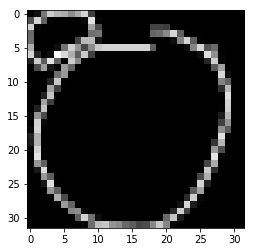

In [32]:
plt.imshow(image.array_to_img(X_train[36,:,:,:]))

In [4]:
np.save('/media/vlados/FreeSpace/Kaggle/dataset_2/X_train.npy', X_train)
np.save('/media/vlados/FreeSpace/Kaggle/dataset_2/Y_train.npy', Y_train)
np.save('/media/vlados/FreeSpace/Kaggle/dataset_2/x_test.npy', x_test)
np.save('/media/vlados/FreeSpace/Kaggle/dataset_2/y_test.npy', y_test)

In [5]:
# After assembling dataset we should clean our RAM
Y_train = None
X_train = None
x_test = None
y_test = None

In [2]:
# This part is made img-format dataset consist of 3 folders:
# train, test, validation
def draw_it(raw_strokes):
        image_ = Image.new("P", (255,255), color=255)
        image_draw = ImageDraw.Draw(image_)

        for stroke in eval(raw_strokes):
            for i in range(len(stroke[0])-1):

                image_draw.line([stroke[0][i], 
                                 stroke[1][i],
                                 stroke[0][i+1], 
                                 stroke[1][i+1]],
                                fill=0, width=6)
        image_ = np.array(image_) 
        image_ = imutils.resize(image_, width=32)
        image_ = image_[:,:,np.newaxis]
        
        return (image_)

def img_dataset_maker(dataset_path, classes_path, dataset_name_dir, train_size, test_size, val_size):
    
    num_img = 0
    iterator = 0
    path_to_train_test_val_folders = dataset_path + '/' + dataset_name_dir
    
    classes_name = os.listdir(classes_path)
    
    os.mkdir(path_to_train_test_val_folders)
    os.mkdir(path_to_train_test_val_folders + '/validation')
    os.mkdir(path_to_train_test_val_folders + '/train')
    os.mkdir(path_to_train_test_val_folders + '/test')
    
    for directory in os.listdir(path_to_train_test_val_folders):
        
        if directory == 'train':
            img_quantity = train_size
        elif directory == 'test':
            img_quantity = test_size
        else:
            img_quantity = val_size
            
        for Class in classes_name:
            
            class_info = pd.read_csv(classes_path + '/' + Class)
            class_info = class_info.values
        
            class_dir_name = class_info[iterator, 5]
            os.mkdir(path_to_train_test_val_folders + '/' + directory + '/' + class_dir_name)
            
            for i in range(img_quantity):
                
                img = draw_it(class_info[i + num_img, 1])
                png_img = image.array_to_img(img)
                png_img = ImageOps.invert(png_img)
                png_img.save(path_to_train_test_val_folders + '/' + directory + '/' + class_dir_name 
                             + '/' + str(class_info[i + num_img,2]) + '.png')
                num_img = i                     

In [3]:
classes_path = '/media/vlados/FreeSpace/Kaggle/train_simple'
dataset_path = '/media/vlados/FreeSpace/Kaggle'
dataset_name_dir = 'Dataset'

img_dataset_maker(dataset_path, classes_path, dataset_name_dir, 5000, 1000, 1000)